In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rioxarray
import os
from pyproj import CRS
import geopandas
from shapely.geometry import box

# Explore forest height data

In [2]:
path_forest_height = '/Users/8n8/Downloads'
filename_forest_height = 'Forest_height_2019_NAM.tiff'

# Pixel values:  0-60 Forest canopy height, meters
#                         101 Water
#                         102 Snow/ice
#                         103 No data

forest_height = rioxarray.open_rasterio(os.path.join(path_forest_height,filename_forest_height))
epsg = forest_height.rio.crs.to_epsg()
crs = CRS(epsg)
forest_height



<xarray.DataArray (band: 1, y: 156004, x: 436004)>
[68018368016 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -161.0 -161.0 -161.0 -161.0 ... -52.0 -52.0 -52.0
  * y            (y) float64 52.0 52.0 52.0 52.0 52.0 ... 13.0 13.0 13.0 13.0
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    LAYER_TYPE:     athematic
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      Layer_1

In [3]:
# Some general information:
print('The Coordinate Reference System (CRS) is ' + str(forest_height.rio.crs))
print('The nodata value is ' + str(forest_height.rio.nodata))
print('The bounding box corners are ' + str(forest_height.rio.bounds()))
print('The width (i.e., number of columns) is ' + str(forest_height.rio.width))
print('The height (i.e., number of rows) is ' + str(forest_height.rio.height))
crs

The Coordinate Reference System (CRS) is EPSG:4326
The nodata value is None
The bounding box corners are (-161.0005, 12.999500000000001, -51.9995, 52.0005)
The width (i.e., number of columns) is 436004
The height (i.e., number of rows) is 156004


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

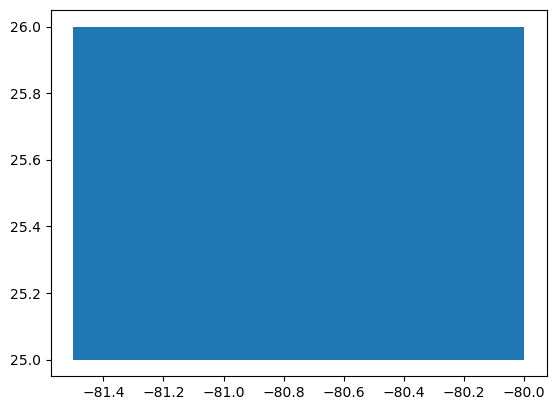

In [12]:
#Clip using a GeoDataFrame
conus_poly_geodf = geopandas.GeoDataFrame(
    geometry=[
        box(-81.50, 25.00, -80.00, 26.00)
    ],
    crs=forest_height.rio.crs
)

conus_poly_geodf.plot()
#
# forest_height_conus = forest_height.rio.clip(conus_poly_geodf.geometry.values, conus_poly_geodf.crs, drop=False, invert=True)
# forest_height.plot(robust = TRUE)

In [44]:
forest_height_conus = rioxarray.open_rasterio(os.path.join(path_forest_height,filename_forest_height), masked=True).rio.clip(conus_poly_geodf.geometry.values,from_disk=True)
forest_height_conus = forest_height_conus.where(forest_height_conus <= 60) # This is the limit for height observations
forest_height_conus

<xarray.DataArray (band: 1, y: 4000, x: 6000)>
array([[[ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * x            (x) float64 -81.5 -81.5 -81.5 -81.5 ... -80.0 -80.0 -80.0 -80.0
  * y            (y) float64 26.0 26.0 26.0 26.0 26.0 ... 25.0 25.0 25.0 25.0
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    LAYER_TYPE:     athematic
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      Layer_1

In [45]:
# Some general information:
print('The Coordinate Reference System (CRS) is ' + str(forest_height_conus.rio.crs))
print('The nodata value is ' + str(forest_height_conus.rio.nodata))
print('The bounding box corners are ' + str(forest_height_conus.rio.bounds()))
print('The width (i.e., number of columns) is ' + str(forest_height_conus.rio.width))
print('The height (i.e., number of rows) is ' + str(forest_height_conus.rio.height))


The Coordinate Reference System (CRS) is EPSG:4326
The nodata value is None
The bounding box corners are (-81.49999999999999, 25.000000000000004, -79.99999999999999, 26.000000000000004)
The width (i.e., number of columns) is 6000
The height (i.e., number of rows) is 4000


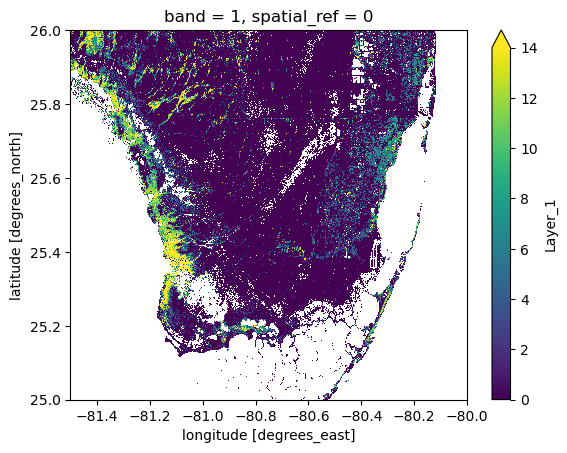

In [46]:
forest_height_conus.plot(robust = True)


In [17]:
forest_height_conus.min()

<xarray.DataArray ()>
array(0, dtype=uint8)
Coordinates:
    spatial_ref  int64 0

In [42]:
tmp = forest_height_conus.copy()
tmp = tmp.where(tmp <= 60)

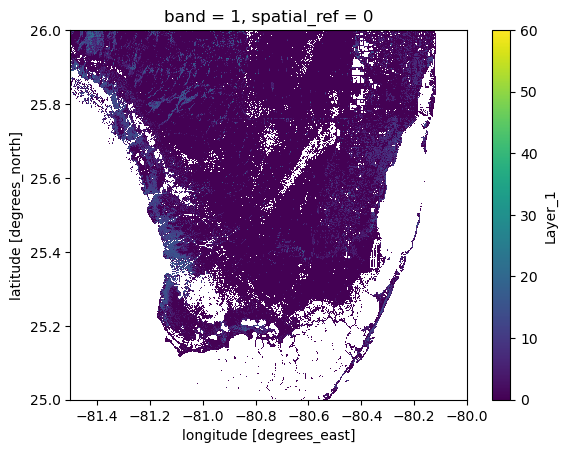

In [43]:
tmp.plot(vmin = 0, vmax = 60, extend = 'neither')

In [39]:
tmp.values[tmp.values > 60] = np.nan()


ValueError: cannot convert float NaN to integer

In [41]:
print(tmp.rio.nodata)

None
